In [119]:
import albumentations as alb
import cv2
import os
import json
import numpy as np
from matplotlib import pyplot as plt

In [156]:
augmentor = alb.Compose(
    [
        alb.RandomCrop(width=450, height=450),
        alb.HorizontalFlip(p=0.5),
        alb.RandomBrightnessContrast(p=0.2),
        alb.RandomGamma(p=0.2),
        alb.VerticalFlip(p=0.5),
    ],
    bbox_params=alb.BboxParams(format='pascal_voc', label_fields=['category_ids'])
)

In [121]:
names = os.listdir(os.path.join('Split-Data', 'train', 'images'))

In [122]:
names

['Devashree', 'Harshu', 'Meenal']

In [123]:
image = []
for name in names:
    image.append(cv2.imread(os.path.join('Split-Data', 'train', 'images', name, 'image_1.jpg')))

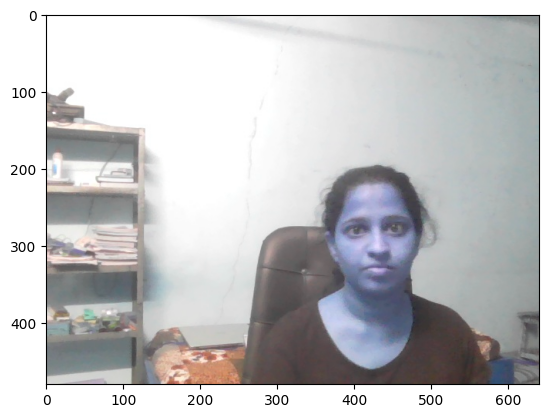

In [124]:
plt.imshow(image[0])

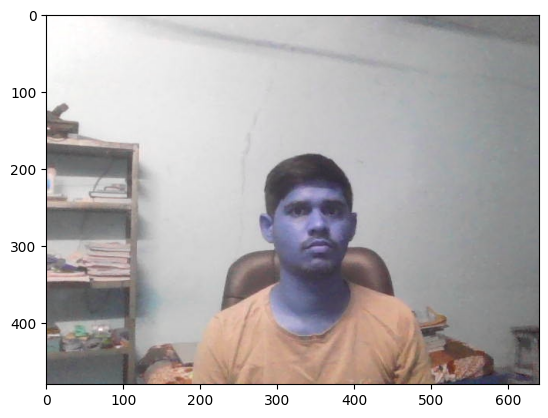

In [125]:
plt.imshow(image[1])

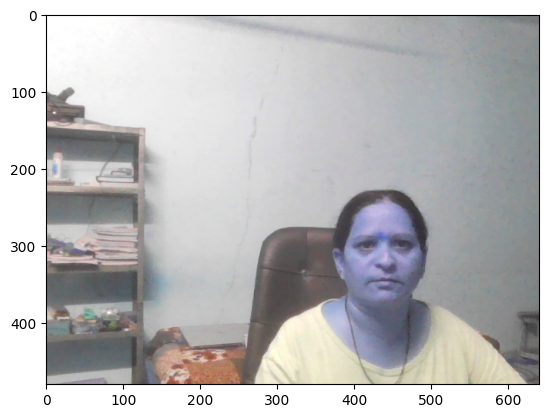

In [126]:
plt.imshow(image[2])

In [127]:
image[0].shape

(480, 640, 3)

In [128]:
labels = []

for name in names:
    with open(os.path.join('Split-Data', 'train', 'labels', name, 'image_1.json'), 'r') as f:
        labels.append(json.load(f))

In [129]:
labels[0]

{'version': '5.2.1',
 'flags': {},
 'shapes': [{'label': 'Face',
   'points': [[351.3131313131313, 192.02020202020202],
    [492.2222222222222, 368.28282828282823]],
   'group_id': None,
   'description': '',
   'shape_type': 'rectangle',
   'flags': {}}],
 'imagePath': '..\\..\\images\\Devashree\\image_1.jpg',
 'imageData': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5

In [130]:
labels[0], labels[1], labels[2]

({'version': '5.2.1',
  'flags': {},
  'shapes': [{'label': 'Face',
    'points': [[351.3131313131313, 192.02020202020202],
     [492.2222222222222, 368.28282828282823]],
    'group_id': None,
    'description': '',
    'shape_type': 'rectangle',
    'flags': {}}],
  'imagePath': '..\\..\\images\\Devashree\\image_1.jpg',
  'imageData': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJ

In [131]:
shape = [0, 0, 0]

In [132]:
for i in range(len(image)):
    shape[i] = labels[i]['shapes']

In [133]:
shape[0]

[{'label': 'Face',
  'points': [[351.3131313131313, 192.02020202020202],
   [492.2222222222222, 368.28282828282823]],
  'group_id': None,
  'description': '',
  'shape_type': 'rectangle',
  'flags': {}}]

In [134]:
shape[0]

[{'label': 'Face',
  'points': [[351.3131313131313, 192.02020202020202],
   [492.2222222222222, 368.28282828282823]],
  'group_id': None,
  'description': '',
  'shape_type': 'rectangle',
  'flags': {}}]

In [135]:
coords = []

for item in shape:
    points = item[0]['points']

    x1 = points[0][0]
    x2 = points[1][0]
    y1 = points[0][1]
    y2 = points[1][1]

    coords.append([x1, y1, x2, y2])

In [136]:
coords

[[351.3131313131313,
  192.02020202020202,
  492.2222222222222,
  368.28282828282823],
 [274.04040404040404,
  177.87878787878788,
  408.8888888888889,
  344.04040404040404],
 [372.52525252525254,
  225.35353535353536,
  495.75757575757575,
  379.8989898989899]]

In [137]:
coords[0]

[351.3131313131313, 192.02020202020202, 492.2222222222222, 368.28282828282823]

In [146]:
augmented = []
i = 0

for img in image:
    augmented.append(
        augmentor(image=img, bboxes=[coords[0]], category_ids = ["object"]))
    i += 1

In [147]:
augmented

[{'image': array([[[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [195, 199, 198],
          [194, 198, 197],
          [193, 197, 197]],
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [195, 199, 198],
          [194, 198, 197],
          [193, 197, 197]],
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [197, 198, 198],
          [196, 197, 197],
          [196, 197, 197]],
  
         ...,
  
         [[137, 146, 148],
          [135, 147, 148],
          [135, 147, 148],
          ...,
          [ 90,  81,  71],
          [ 90,  81,  71],
          [ 91,  79,  72]],
  
         [[139, 147, 150],
          [137, 148, 150],
          [137, 148, 150],
          ...,
          [ 92,  81,  77],
          [ 92,  82,  74],
          [ 93,  81,  77]],
  
         [[139, 150, 152],
          [139, 150, 152],
          [139,

In [154]:
aug_img = augmented[2]['image']
aug_bbox = augmented[2]['bboxes'][0]

cv2.rectangle(aug_img,
              (int(aug_bbox[0]), int(aug_bbox[1])),
              (int(aug_bbox[2]), int(aug_bbox[3])),
              (0, 255, 255), 2)

array([[[176, 172, 158],
        [174, 169, 155],
        [175, 171, 157],
        ...,
        [255, 250, 237],
        [255, 250, 237],
        [255, 251, 238]],

       [[177, 170, 157],
        [175, 171, 157],
        [176, 172, 158],
        ...,
        [255, 250, 237],
        [255, 250, 237],
        [255, 250, 237]],

       [[176, 169, 156],
        [177, 173, 159],
        [177, 173, 159],
        ...,
        [255, 250, 237],
        [255, 250, 237],
        [255, 250, 237]],

       ...,

       [[215, 202, 158],
        [214, 203, 160],
        [217, 205, 164],
        ...,
        [192, 183, 170],
        [190, 181, 168],
        [194, 185, 172]],

       [[214, 199, 156],
        [211, 200, 159],
        [216, 203, 164],
        ...,
        [196, 187, 174],
        [199, 190, 177],
        [199, 190, 177]],

       [[212, 196, 156],
        [210, 198, 157],
        [216, 203, 164],
        ...,
        [200, 189, 176],
        [199, 188, 175],
        [200, 189, 176]]

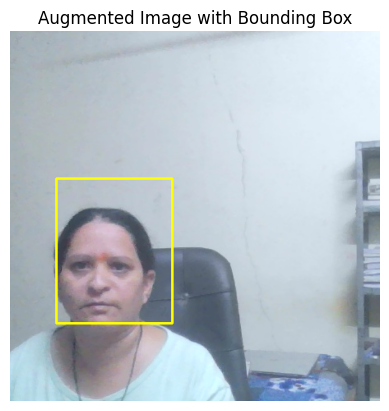

In [155]:
plt.imshow(cv2.cvtColor(aug_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Augmented Image with Bounding Box")
plt.show()